# Filtro pasa banda IIR
Se hace este script para probar los filtros recursivos de
 - Chebyshev tipo 1
 - Chebyshev tipo 2
 - Butterworth

C:\Users\marti\AppData\Local\Temp\ipykernel_6424\2509642951.py:46: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(w, 20 * np.log10(abs(h)))


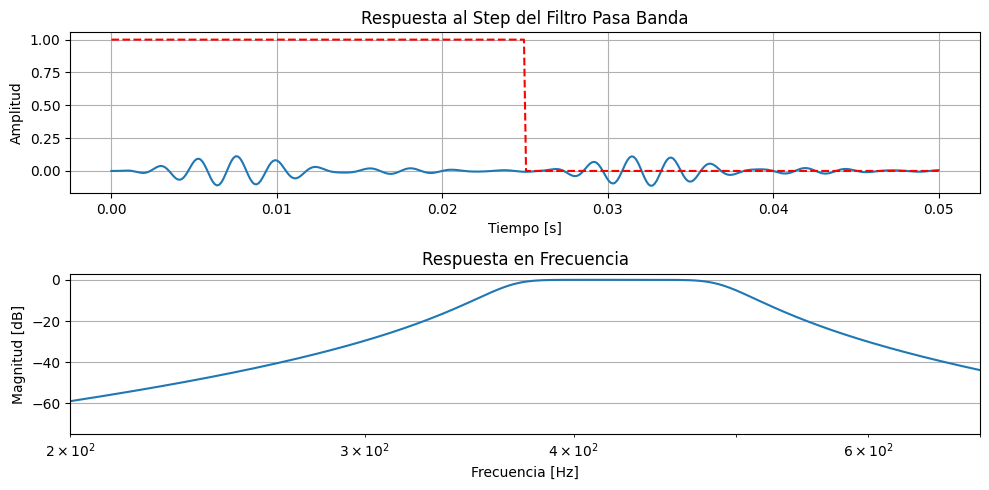

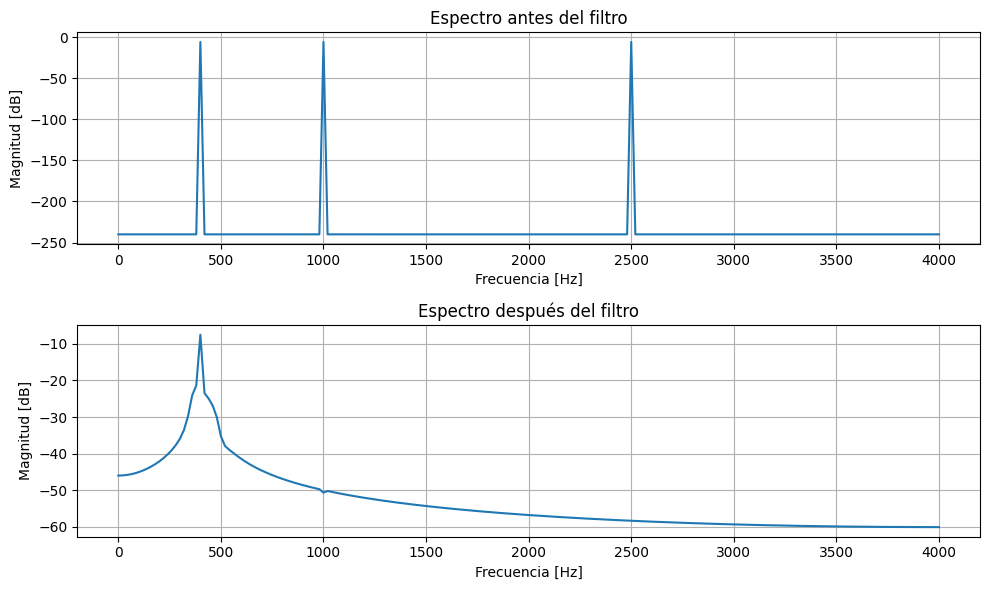

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cheby1, cheby2, butter, sosfilt, sosfreqz, step

# ================================
# Parámetros del filtro 
# ================================
f_inf = 365.2    # Corte inferior (Hz)
f_central = 424.1  # Central (Hz)
f_sup = 492.6    # Corte superior (Hz)
fs = 8000        # Frecuencia de muestreo (Hz)
ripple = 1       # Ripple en banda pasante (dB)
attenuation = 60 # Atenuación en banda rechazada (dB)
order = 4        # Orden del filtro

# ================================
# Diseño del filtro Chebyshev I/II/ Butter pasa banda
# ================================
low = f_inf / (fs / 2)
high = f_sup / (fs / 2)

# Dejar solo el deseado sin comentar de estos tres:
sos = butter(order, [low, high], btype='bandpass', output='sos')
#sos = cheby1(order, ripple, [low, high], btype='bandpass', output='sos')
#sos = cheby2(order, attenuation, [low, high], btype='bandpass', output='sos')

# ================================
# Respuesta al step
# ================================
t = np.linspace(0, 0.05, int(fs * 0.05))
x_step = np.concatenate((np.ones(len(t)//2),np.zeros(len(t)//2)))
y_step = sosfilt(sos, x_step)

plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(t, y_step)
plt.plot(t, x_step, 'r--')
plt.title('Respuesta al Step del Filtro Pasa Banda')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

# ================================
# Respuesta en frecuencia
# ================================
w, h = sosfreqz(sos, worN=2048, fs=fs)
plt.subplot(2, 1, 2)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Respuesta en Frecuencia')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.xlim(200, 700)
plt.ylim(-75, 3)
plt.grid(True)
plt.tight_layout()
plt.show()

# ================================
# Señal de prueba: suma de 3 senoidales
# ================================
t = np.linspace(0, 0.05, int(fs * 0.05), endpoint=False)
f1, f2, f3 = 400, 1000, 2500  # Hz
x = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t) + np.sin(2 * np.pi * f3 * t)

# Filtrar la señal
y = sosfilt(sos, x)

# ================================
# Espectro antes y después
# ================================
def plot_spectrum(sig, fs, title):
    N = len(sig)
    f = np.fft.rfftfreq(N, 1/fs)
    S = np.abs(np.fft.rfft(sig)) / N
    plt.plot(f, 20 * np.log10(S + 1e-12))
    plt.title(title)
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Magnitud [dB]')
    plt.grid(True)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plot_spectrum(x, fs, 'Espectro antes del filtro')

plt.subplot(2, 1, 2)
plot_spectrum(y, fs, 'Espectro después del filtro')

plt.tight_layout()
plt.show()
